# **Problem Statement**


One of the greatest challenges faced by service companies is to retain its customers. More customers
means more business and revenue to the company. The cost involved in targeting new customers is a
lot more than the effort to retain the existing ones. Keeping this in mind, companies (that also includes
banks) try to get some insights into the customer data to identify those customers who are likely to leave
(churn).
Companies employ lots of techniques to retain their existing customers – viz: loyalty programs, better
discount rates, priority services, etc. The advantage of using these techniques is to determine what
causes the churn and how it can be reduced in today’s highly competitive market.

# **Aim & Objective**

Aim:
The aim of this project is to Build a predictive model to determine which
customers are likely to churn (leave the bank).To determine the probabilities of churn for each customer from given set of customer.

Objective:
1. Understand the data very well. Do all
transformations / data engineering / etc. wherever
applicable

2. Perform Exploratory Data Analysis (EDA)

3.  Carry out all the Data mining tasks

4. Identify the salient features that will determine the
best results

5. Perform the model evaluation to select the
appropriate algorithms


# **Importing required liabraries**

In [247]:
import numpy as np                                                                         # working with arrays
import pandas as pd                                                                        # loading the dataset
import matplotlib.pyplot as plt                                                            # visualization
import seaborn as sb                                                                       # visualization and correlation
from numpy import mean
from numpy import std

from sklearn import preprocessing                                                          # data preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler    # data scaling
from sklearn.model_selection import train_test_split,StratifiedKFold,KFold,LeaveOneOut,RepeatedStratifiedKFold     # data splitting
from sklearn.preprocessing import OneHotEncoder                                            # Feature Engineering

# model building liabraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVR

# model evaluation
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

# **Step 1 : Data Collection**

In [ ]:
# Uploading file on drive

from google.colab import files
upload = files.upload()

Saving DS3_C6_S2_Classification_BankChurn_Data_Project.csv to DS3_C6_S2_Classification_BankChurn_Data_Project.csv


In [ ]:
# Reading CSV train data file into DataFrame

df = pd.read_csv("DS3_C6_S2_Classification_BankChurn_Data_Project.csv")

In [ ]:
# previewing the data

df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Step 2 : Data Exploration**

## **2.1) Finding the information about the dataset**

In [ ]:
# shape of the dataset

print('Number of rows in data is {}.'.format(df.shape[0]))
print('Number of columns in data is {}.'.format(df.shape[1]))

Number of rows in data is 10000.
Number of columns in data is 13.


In [ ]:
# Columns in the dataframe

df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
# exploring the existing data types

df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# exploring the numeric data types

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [ ]:
# exploring the strings

df_string=df.select_dtypes(exclude=[np.number])
df_string.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [ ]:
# checking missing values in data

df.isnull().sum()    # isnull returns the True/False dataframe
                     # sum: counts the number of True in columns

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Interpretation: There are no any missing values

In [ ]:
# finding for duplicated entries

df.duplicated().sum()

0

Interpretation : There are no any duplicate rows

In [ ]:
# Seprating out the categorical and continuous variables

def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 30:        # nunique:  returns unique values in the column,
                                             #here 30 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)

    return categorical, continuous


categorical, continuous = seprate_data_types(df)     # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  ---------------
Geography       CustomerId
Gender          Surname
Tenure          CreditScore
NumOfProducts   Age
HasCrCard       Balance
IsActiveMember  EstimatedSalary
Exited


Interpretation :

1.  Even though the features "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember", and "Exited" are integer values, I will treat them as categorical variables for Exploratory Data Analysis because they each have fewer than 30 unique values.

2.  I will remove 'Surname' and 'CustomerId' from list of continuous features, for ease during Exploratory Data Analysis

In [ ]:
# Removing 'Surname' and 'CustomerId' from list of continuous features

continuous.remove('Surname')
continuous.remove('CustomerId')

In [ ]:
# Again previewing list of continuous variables

continuous

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [ ]:
# Finding count of customers who have attrited and who are still customers

df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Interpretation : There are 7963 customers who are still with the bank and 2037 customers have exited

# **2) Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is conducted to gain valuable insights and patterns from the dataset. Through visualizations
and statistical analysis, we identify correlations between features and the traget variable, detect outliers and explore
potential relationships within the data.

### $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

In [ ]:
"""User defined function for analysis of categorical columns
This function will check for the following :
Unique values
Mode
Total count of missing values"""

def info_of_cat(col):
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is {df[col].mode()[0]}")
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}")

In [ ]:
# for each categorical attribute calling a function

for i in categorical:
    info_of_cat(i)
    print('-------------------------------------------------------')

Unique values in Geography are: ['France' 'Spain' 'espanio' 'fra' 'Germany' 'france' 'ger' 'spain'
 'germany' 'gernamy' 'GERMANY']
Mode of Geography is France
Number of missing values in Geography is 0
-------------------------------------------------------
Unique values in Gender are: ['Female' 'Male']
Mode of Gender is Male
Number of missing values in Gender is 0
-------------------------------------------------------
Unique values in Tenure are: [ 2  1  8  7  4  6  3 10  5  9  0]
Mode of Tenure is 2
Number of missing values in Tenure is 0
-------------------------------------------------------
Unique values in NumOfProducts are: [1 3 2 4]
Mode of NumOfProducts is 1
Number of missing values in NumOfProducts is 0
-------------------------------------------------------
Unique values in HasCrCard are: [1 0]
Mode of HasCrCard is 1
Number of missing values in HasCrCard is 0
-------------------------------------------------------
Unique values in IsActiveMember are: [1 0]
Mode of IsActiveM

## **2.1) Analysis of Geography**

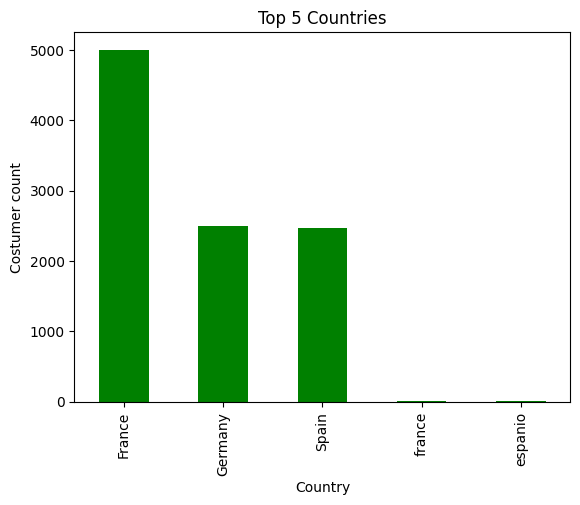

In [ ]:
# Finding Top 5 Countries

df['Geography'].value_counts().sort_values(ascending=False)[0:5].plot(kind='bar',color='green')
plt.title('Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Costumer count')
plt.show()

## **2.2) Analysis of Gender**

[]

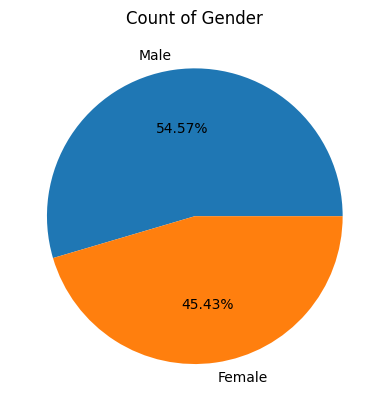

In [ ]:
# visual respresentation of gender attribute

count = df['Gender'].value_counts()
labels = list(count.index)
plt.pie(count, labels=labels, autopct='%.2f%%')
plt.title("Count of Gender")
plt.plot()

## **2.3) Analysis of Tenure**

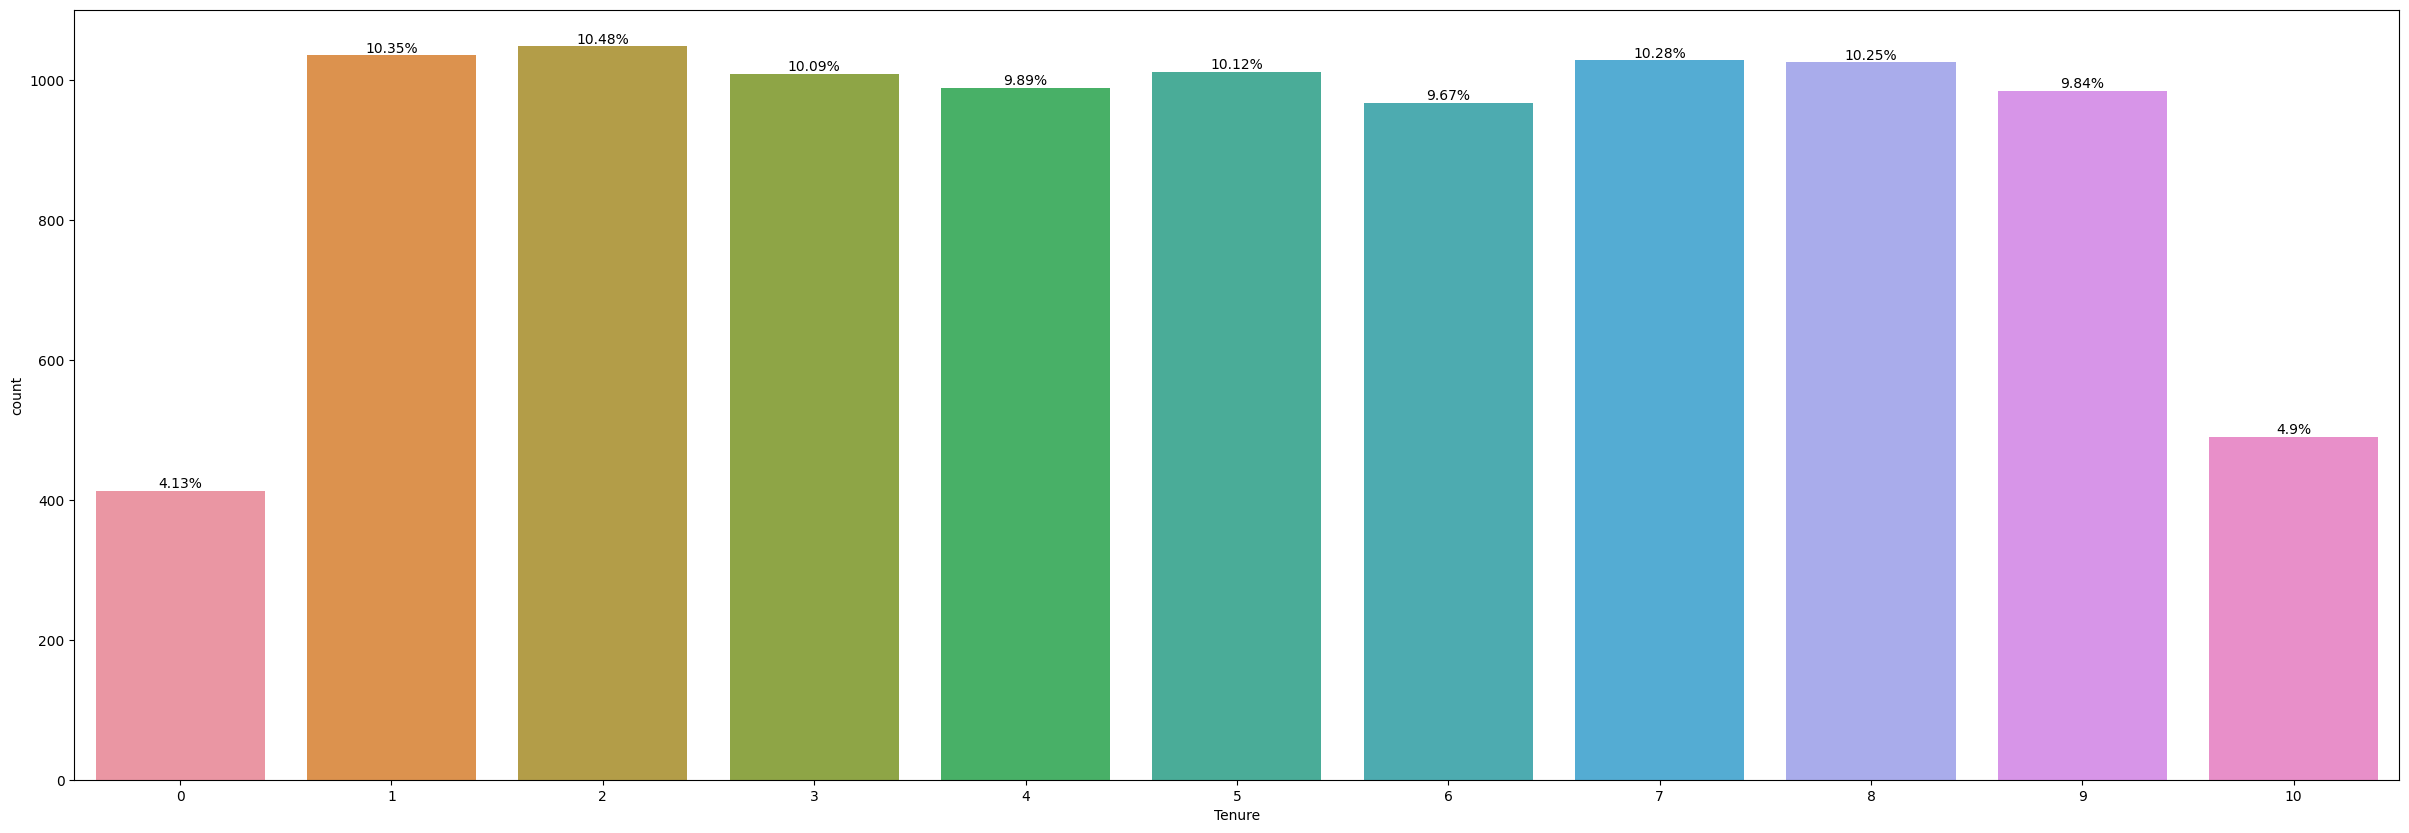

In [ ]:
# Visual representation of classif attribute

fig, ax = plt.subplots(figsize= (12, 6))                            # setting canvas for plot
ax = sb.countplot(x = df['Tenure'])                                 # countplot
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height()*100 /len(df), 2)}%"      # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage)
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head.
    fig.set_figheight(10)                                           # annotate: used to annotate over objects, here objects are the bars
    fig.set_figwidth(30)
plt.show()

## **2.4) Analysis of NumOfProducts**

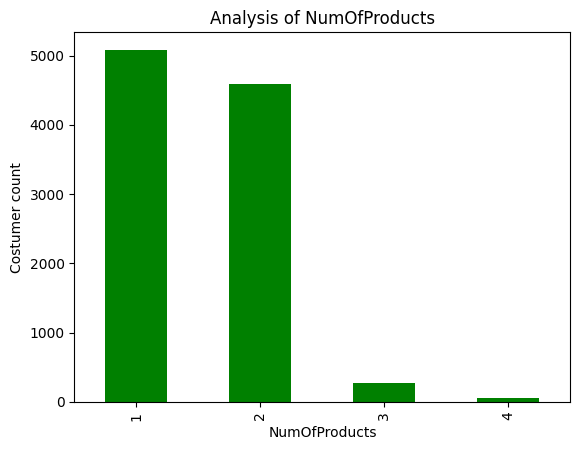

In [ ]:
# visual respresentation of NumOfProducts attribute

df['NumOfProducts'].value_counts().sort_values(ascending=False).plot(kind='bar',color='green')
plt.title('Analysis of NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Costumer count')
plt.show()

## **2.5) Analysis of HasCrCard**

[]

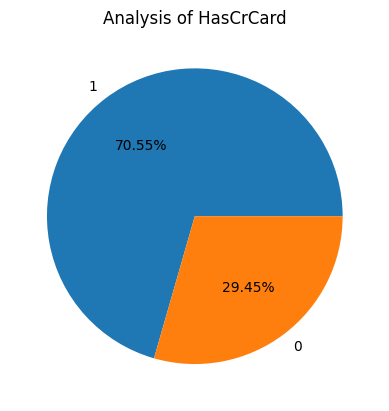

In [ ]:
# visual respresentation of HasCrCard attribute

count = df['HasCrCard'].value_counts()
labels = list(count.index)
plt.pie(count, labels=labels, autopct='%.2f%%')
plt.title("Analysis of HasCrCard")
plt.plot()

## **2.6) Analysis of IsActiveMember**

[]

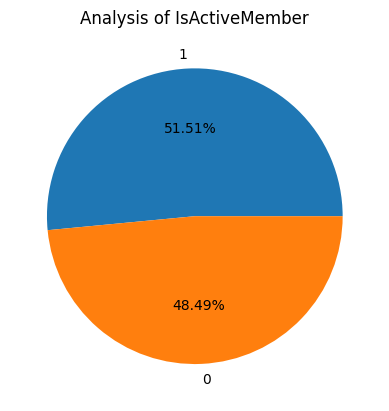

In [ ]:
# visual respresentation of IsActiveMember attribute

count = df['IsActiveMember'].value_counts()
labels = list(count.index)
plt.pie(count, labels=labels, autopct='%.2f%%')
plt.title("Analysis of IsActiveMember")
plt.plot()

## **2.7) Analysis of Exited**

[]

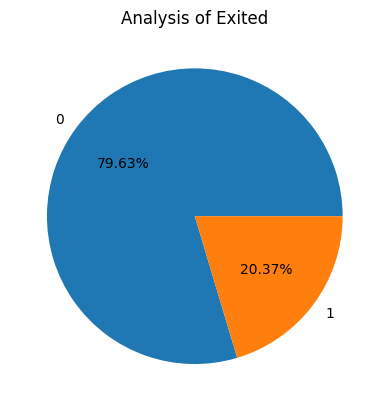

In [ ]:
# visual respresentation of Exited attribute

count = df['Exited'].value_counts()
labels = list(count.index)
plt.pie(count, labels=labels, autopct='%.2f%%')
plt.title("Analysis of Exited")
plt.plot()

### $$\;\;\;\; Bivariate \ Analysis \ of \ Categorical \ Variables$$

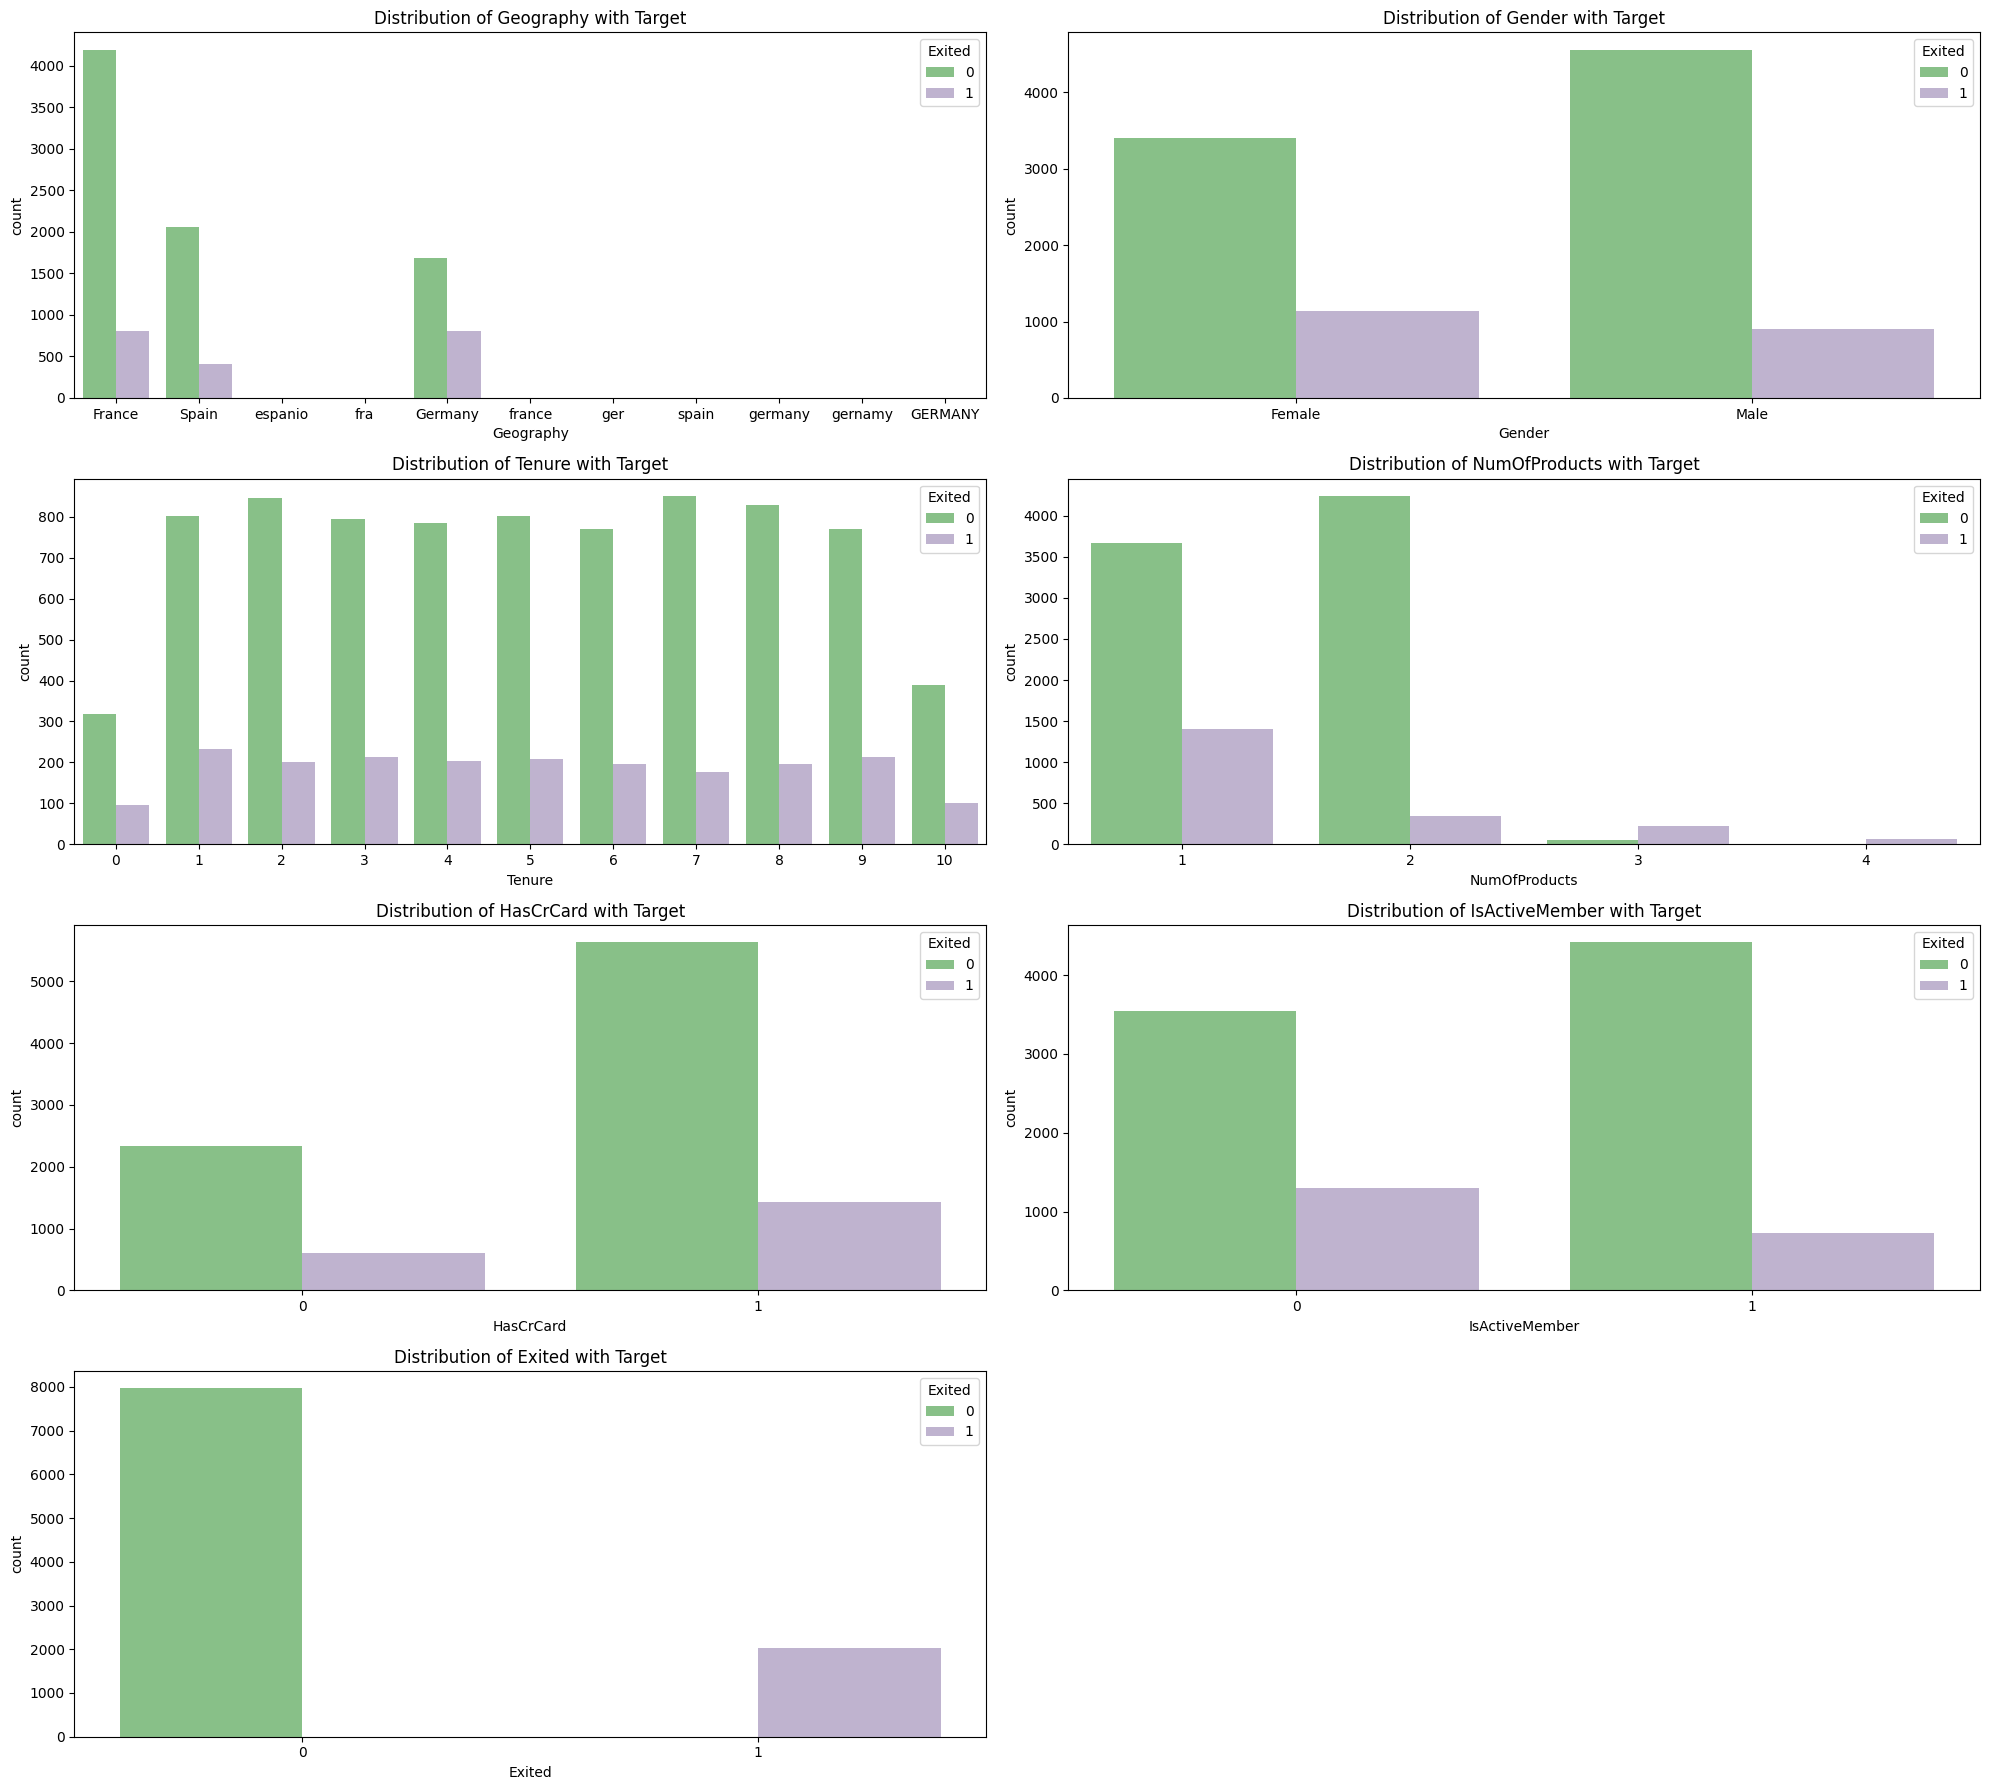

In [ ]:
# Visual representation of categorical columns with respect to target variable using countplot

# Setting canvas for plots.
plt.figure(figsize=(20,18))

# Iterating over the categorical features in the DataFrame.
for index, c in enumerate(categorical):

    # Creating a subplot for the current feature.
    plt.subplot(4,2, index+1)

    # Creating a countplot of the feature, with the hue parameter set to Exited.
    sb.countplot(x=c, data=df, hue='Exited', palette='Accent')

    # Setting the title of the subplot to explain what the plot is showing.
    plt.title(f"Distribution of {c} with Target")

# Ensuring that the subplots are laid out neatly.
plt.tight_layout()


**By Close observation of each bar chart, we can come to following conclusions:**

1.  More customers from Germany have exited the bank than customers from other countries.

2. More female customers have attrited the bank than male customers.

3. The majority of customers attrited within one year of opening an account.

4. Customers with only one product are more likely to attrite the bank.



### $$\;\;\;\; Univariate \ Analysis \ of \ Continuous \ Variables$$

In [ ]:
# User defined function for calculating mean, median, mode, standard deviation, and count of all null values of numerical columns

def info_of_numerical(col):
    print(f"The mean of the {col} is {round(df[col].mean(),2)}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The max of the {col} is {df[col].max()}")
    print(f"The min of the {col} is {df[col].min()}")
    print(f"The standard deviation of the {col} is {round(df[col].std(),2)}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [ ]:
# Analysis of numerical datatypes

for i in continuous:
    info_of_numerical(i)
    print('-------------------------------------------------------')

The mean of the CreditScore is 650.53
The median of the CreditScore is 652.0
The mode of the CreditScore is 850
The max of the CreditScore is 850
The min of the CreditScore is 350
The standard deviation of the CreditScore is 96.65
Number of missing values in the CreditScore is 0
-------------------------------------------------------
The mean of the Age is 38.92
The median of the Age is 37.0
The mode of the Age is 37
The max of the Age is 92
The min of the Age is 18
The standard deviation of the Age is 10.49
Number of missing values in the Age is 0
-------------------------------------------------------
The mean of the Balance is 76485.89
The median of the Balance is 97198.54000000001
The mode of the Balance is 0.0
The max of the Balance is 250898.09
The min of the Balance is 0.0
The standard deviation of the Balance is 62397.41
Number of missing values in the Balance is 0
-------------------------------------------------------
The mean of the EstimatedSalary is 100090.24
The median of

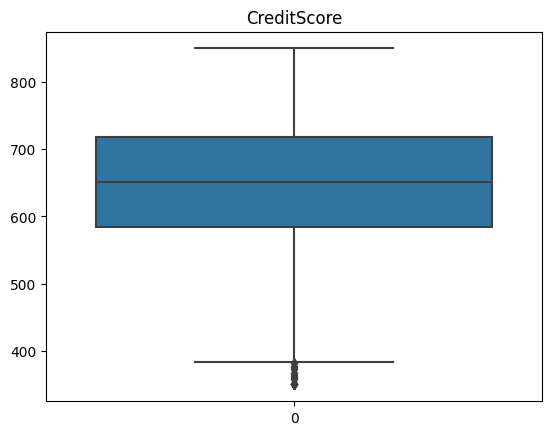

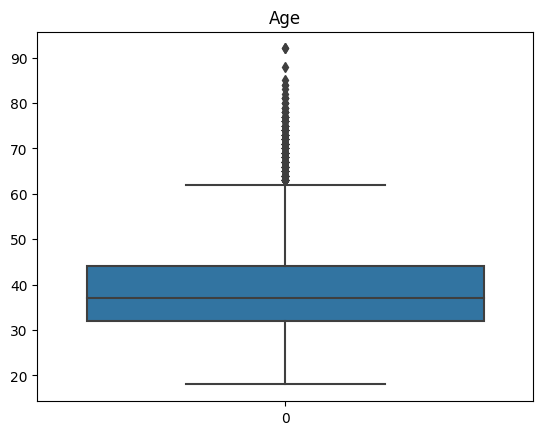

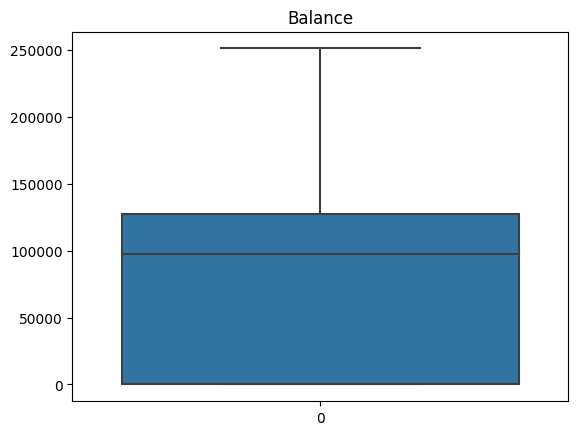

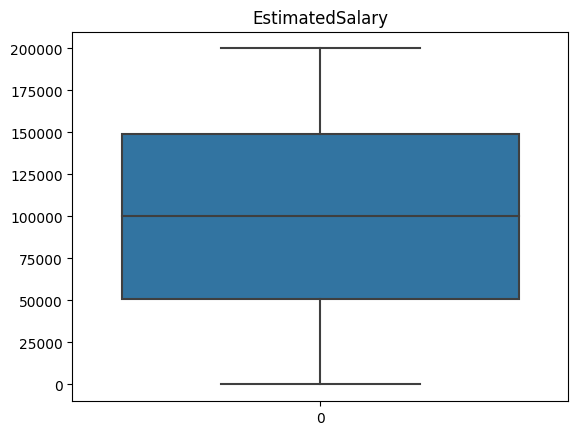

In [ ]:
# Finding outliers using boxplot

def boxplots(col):
    sb.boxplot(df[col])
    plt.title(col)
    plt.show()

for i in list(continuous):
     boxplots(i)

Interpretation :

Observing that 'credit score' attribute has less outliers and 'age' has significant of outliers. I will check proportion of outliers in 'age' attribute. and there are no outliers in 'Balance' and 'Estimated Salary'

In [ ]:
# checking outliers in 'age'

Q3 = np.percentile(df['Age'],75)
Q1 = np.percentile(df['Age'],25)
IQR = Q3-Q1
Max_Val = Q3 + (1.5*IQR)
Min_Val = Q1 - (1.5*IQR)
outliers = []

for i in df['Age']:
  if (i<Min_Val) or (i>Max_Val):
    outliers.append(i)

print(f"Number of outliers in the target variable {len(outliers)} and its proportion is {len(outliers)/len(df)}.")

Number of outliers in the target variable 359 and its proportion is 0.0359.


In [ ]:
# Removing the outliers is better idea as we don't have many outliers

for i in continuous:
 Q3 = np.percentile(df[i], 75)
 Q1= np.percentile(df[i], 25)
 IQR = Q3 - Q1
 Max_Val = Q3 + (1.5*IQR)
 Min_Val = Q1 - (1.5*IQR)
 df.drop(df[df[i] > Max_Val].index, inplace=True)
 df.drop(df[df[i] < Min_Val].index, inplace=True)

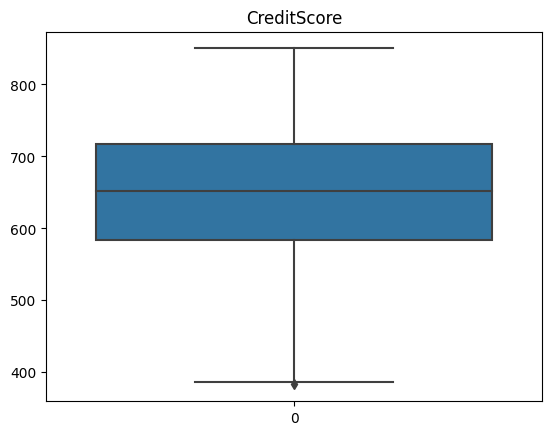

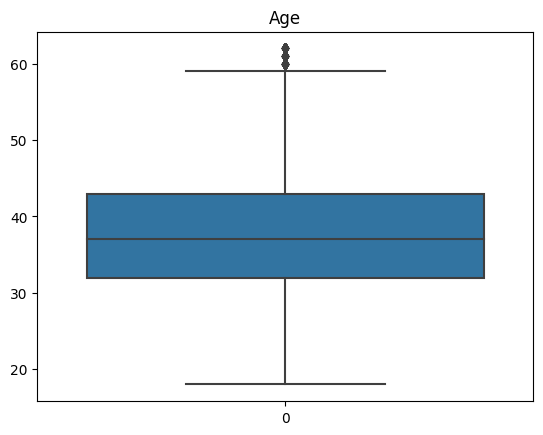

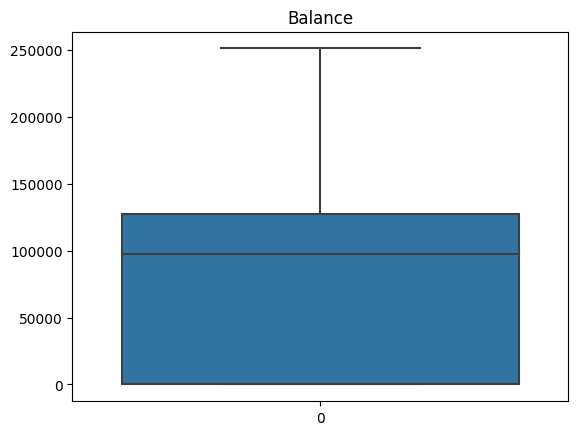

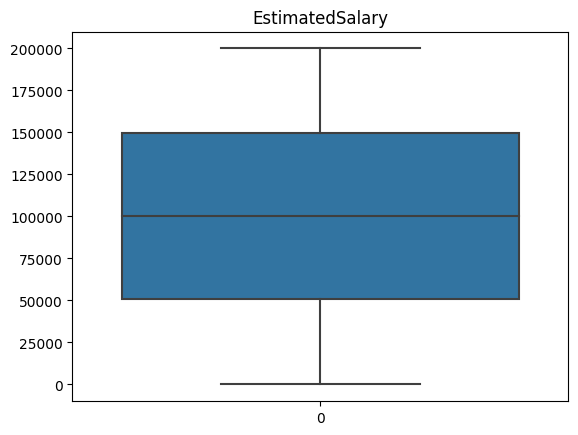

In [ ]:
# Again checking for outliers

def boxplots(col):
    sb.boxplot(df[col])
    plt.title(col)
    plt.show()

for i in list(continuous):
     boxplots(i)

Interpretation : It is seen that, outliers have been removed.

## **Analysis of continuous variable using histogram**

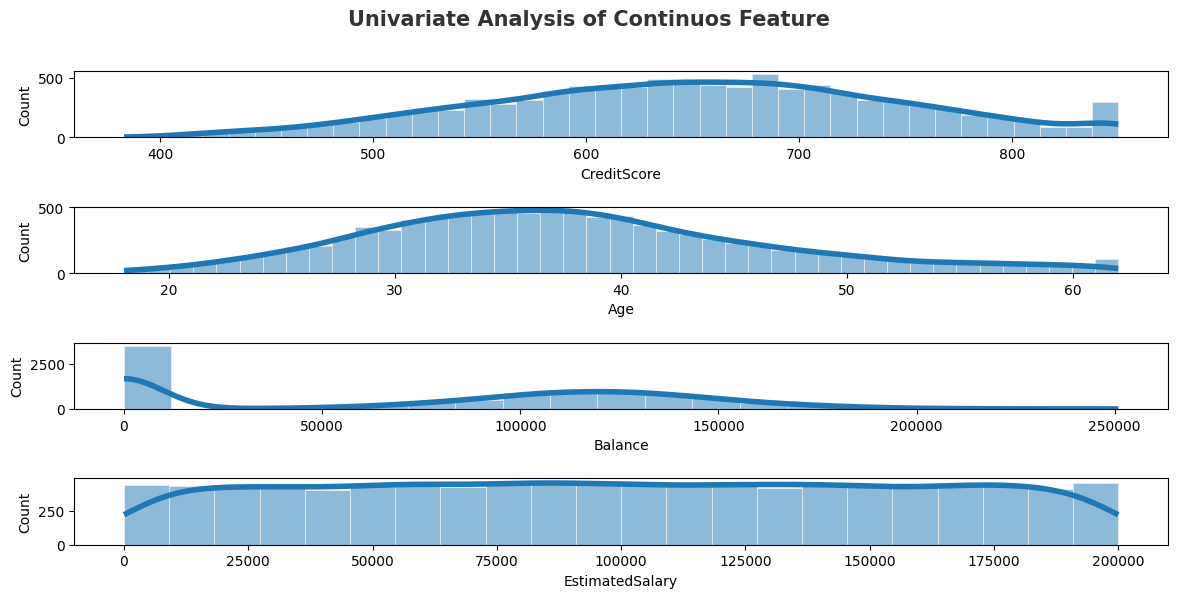

In [ ]:
# histplot of continuous variable

fig,axs=plt.subplots(nrows=4,ncols=1,figsize=(12, 6))
plt.suptitle('Univariate Analysis of Continuos Feature',fontsize=15,fontweight='bold',alpha=0.8,y=1,color='black')
plt.style.use('fivethirtyeight')
plt.rcParams.update({'text.color':'black'})
axs=axs.flatten()

for i,var in enumerate(continuous):
    sb.histplot(x=var,data=df,ax=axs[i],kde=True)

fig.tight_layout()

In [ ]:
# creating copy of dataframe for individual analysis of continuous variable

df_copy = df.copy()

### **2.8) Analysis of CreditScore**

In [ ]:
# Calculating the quantiles of the CreditScore column.

df_copy['CreditScore'].quantile([0.1,0.25,0.50,0.75,0.90])

0.10    522.5
0.25    584.0
0.50    652.0
0.75    717.0
0.90    777.0
Name: CreditScore, dtype: float64

<Axes: xlabel='CreditScore', ylabel='Count'>

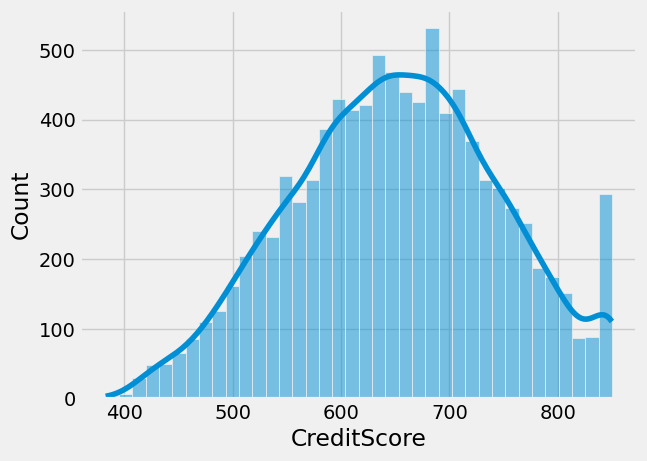

In [ ]:
# Plotting histplot

sb.histplot(df_copy['CreditScore'], kde=True)

### **2.9) Analysis of Age**

In [ ]:
# Calculating the quantiles of the Age column.

df_copy['Age'].quantile([0.1,0.25,0.50,0.75,0.90])

0.10    27.0
0.25    32.0
0.50    37.0
0.75    43.0
0.90    50.0
Name: Age, dtype: float64

In [ ]:
# Calculate the descriptive statistics of the Age column.

df_copy['Age'].describe().loc[['min','max']]

min    18.0
max    62.0
Name: Age, dtype: float64

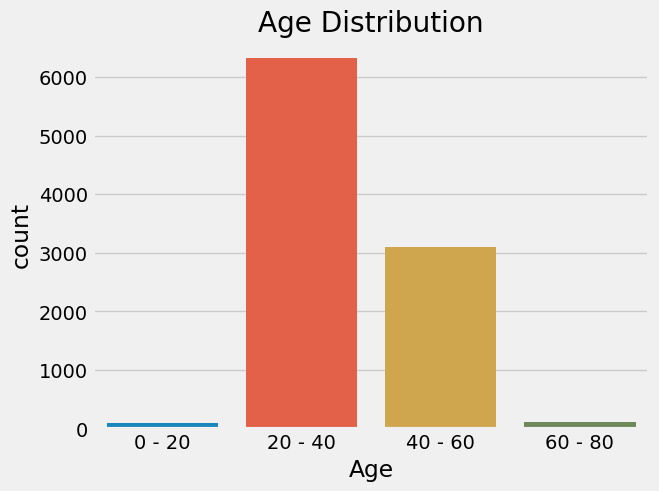

In [ ]:
# Creating a list of labels for the age bins.
labels= ['0 - 20','20 - 40','40 - 60','60 - 80']

# Cutting the Age column into bins using the specified labels.
df_copy['Age'] = pd.cut(df_copy['Age'], bins=[0,20,40,60,80], labels=labels)

# Creating a countplot of the Age column.
sb.countplot(x=df_copy['Age'])

# Setting the title of the plot.
plt.title('Age Distribution')

# Displaying the plot.
plt.show()

Interpretation : It is seen that more than 6000 customers belong to age group 20-40 and around 3000 customers belong to age group 40-60

### **2.10) Analysis of Balance**

In [ ]:
# Calculating the quantiles of the Balance column.

df_copy['Balance'].quantile([0.1,0.25,0.50,0.75,0.90])

0.10         0.00
0.25         0.00
0.50     97277.13
0.75    127647.84
0.90    149341.03
Name: Balance, dtype: float64

In [ ]:
# Calculate the descriptive statistics of the Balance column.

df_copy['Balance'].describe().loc[['min','max']]

min         0.00
max    250898.09
Name: Balance, dtype: float64

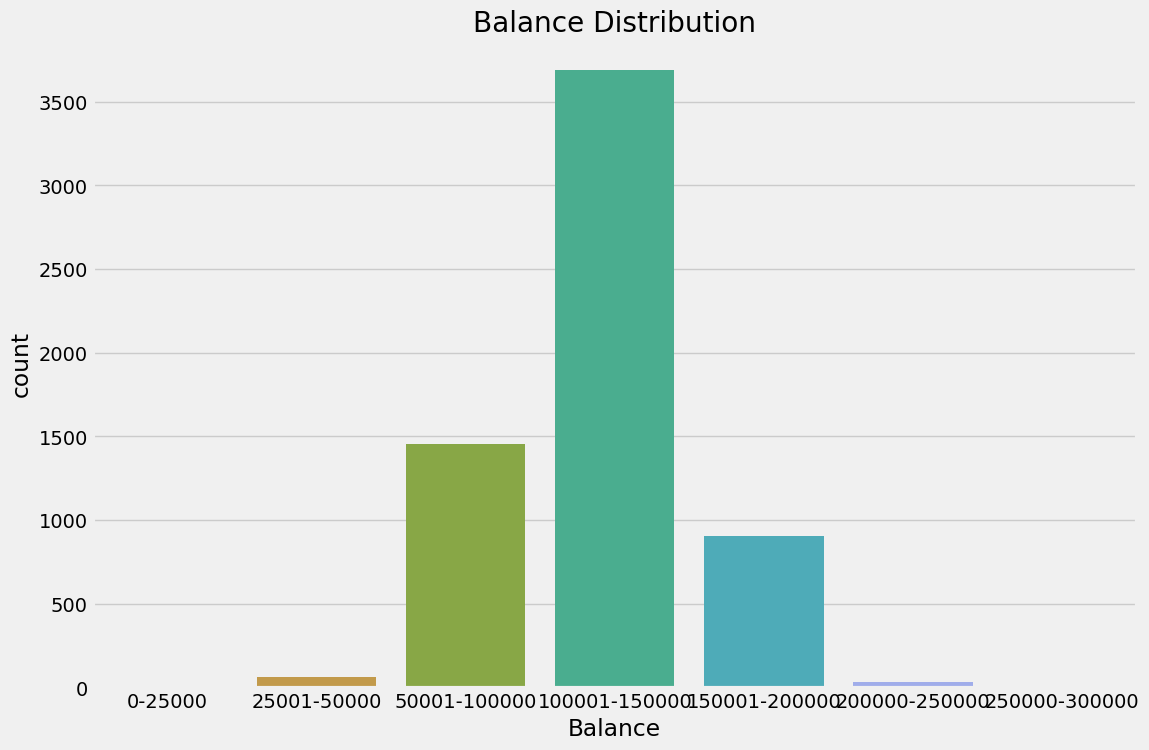

In [ ]:
# Creating a list of labels for the Balance bins.
labels= ['0-25000','25001-50000','50001-100000','100001-150000','150001-200000','200000-250000','250000-300000']

# Cutting the Balance column into bins using the specified labels.
df_copy['Balance'] = pd.cut(df_copy['Balance'], bins=[0,25000,50000,100000,150000,200000,250000,300000], labels=labels)


# setting size of plot
plt.figure(figsize=(12,8))

# Creating a countplot of the Age column.
sb.countplot(x=df_copy['Balance'])

# Setting the title of the plot.
plt.title('Balance Distribution')

# Displaying the plot.
plt.show()

## **2.11) Analysis of EstimatedSalary**

In [ ]:
# Calculating the quantiles of the EstimatedSalary column.

df_copy['EstimatedSalary'].quantile([0.1,0.25,0.50,0.75,0.90])

0.10     20121.6400
0.25     51012.4725
0.50    100185.2400
0.75    149414.4550
0.90    179645.2800
Name: EstimatedSalary, dtype: float64

In [ ]:
# Calculate the descriptive statistics of the EstimatedSalary column.

df_copy['EstimatedSalary'].describe().loc[['min','max']]

min        11.58
max    199992.48
Name: EstimatedSalary, dtype: float64

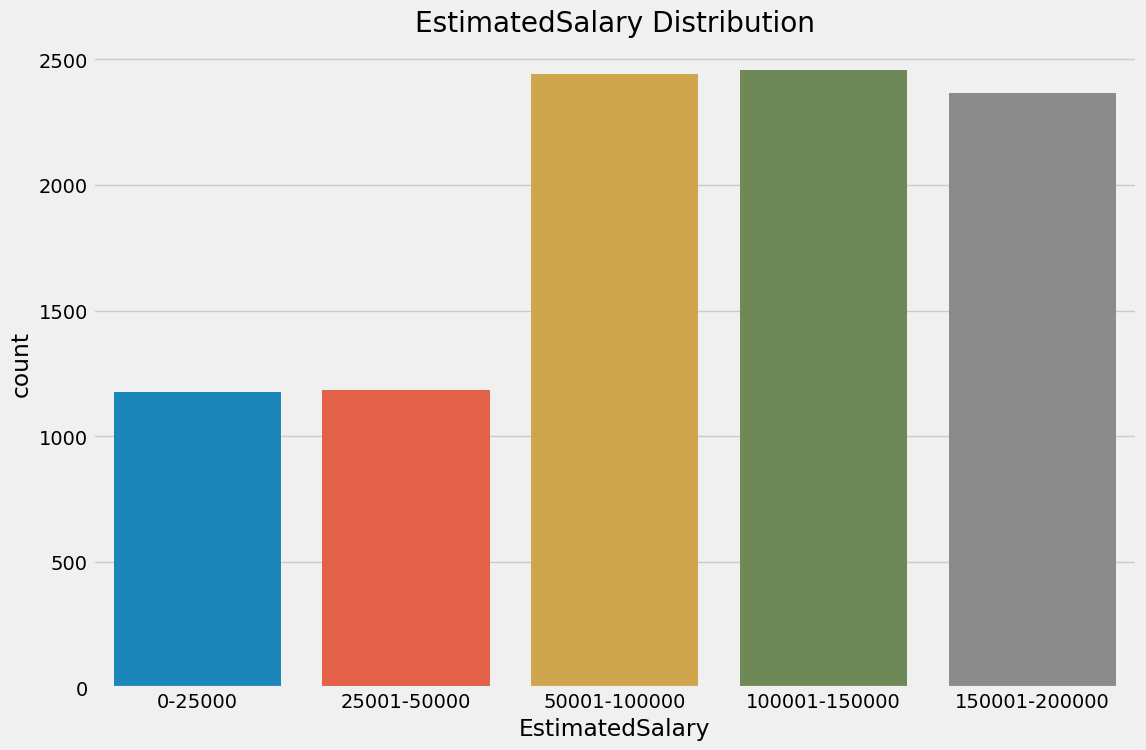

In [ ]:
# Creating a list of labels for the EstimatedSalary bins.
labels= ['0-25000','25001-50000','50001-100000','100001-150000','150001-200000']

# Cutting the EstimatedSalary column into bins using the specified labels.
df_copy['EstimatedSalary'] = pd.cut(df_copy['EstimatedSalary'], bins=[0,25000,50000,100000,150000,200000], labels=labels)


# setting size of plot
plt.figure(figsize=(12,8))

# Creating a countplot of the EstimatedSalary column.
sb.countplot(x=df_copy['EstimatedSalary'])

# Setting the title of the plot.
plt.title('EstimatedSalary Distribution')

# Displaying the plot.
plt.show()

### $$\;\;\;\; Bivariate \ Analysis \ of \ Continuous \ Variables$$

In [ ]:
# continuous features

continuous

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [ ]:
# creating datafrme of numerical features including target variable

num_df = df[['CreditScore','Age','Balance','EstimatedSalary','Exited']]

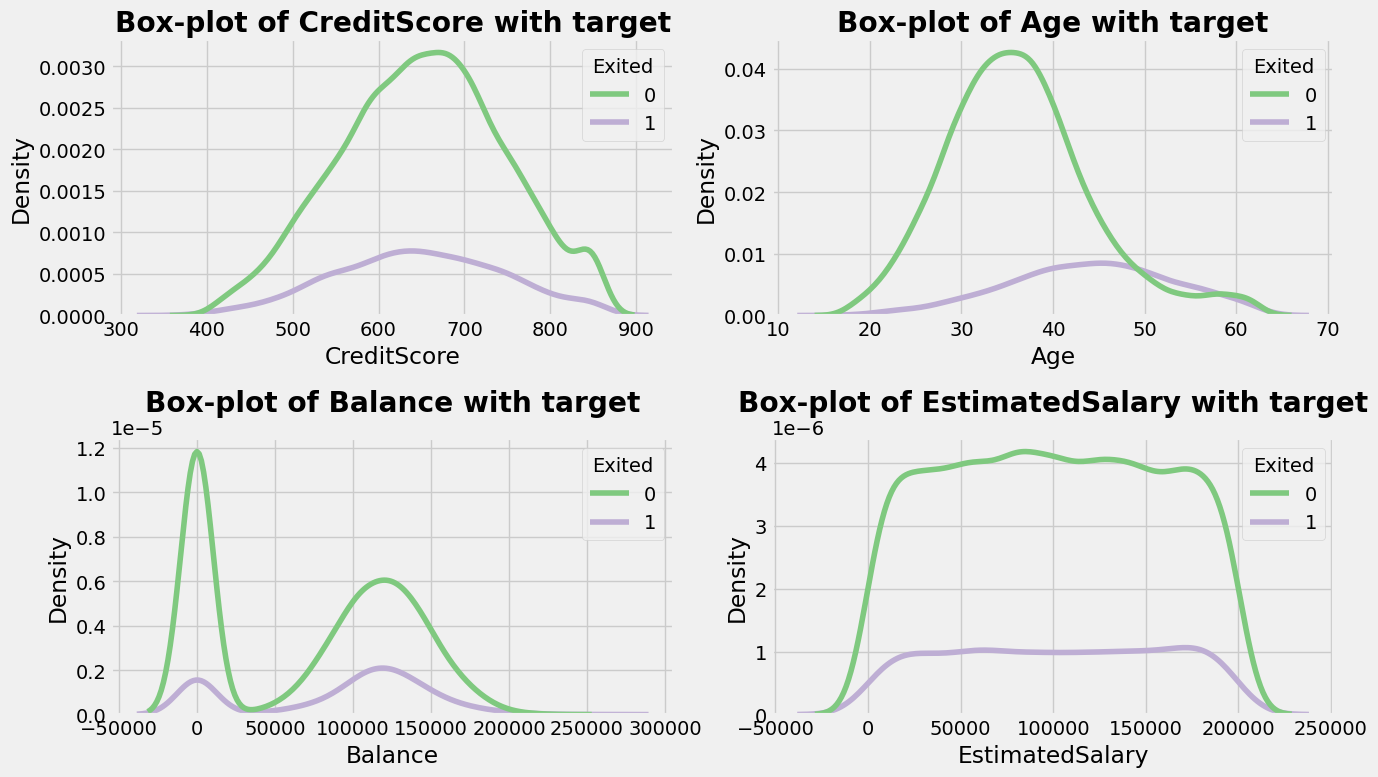

In [ ]:
# kdeplot

plt.figure(figsize=(14,8))
for index, k in enumerate(continuous):
 plt.subplot(2,2, index+1)
 sb.kdeplot(x=k, data=df, hue='Exited', palette='Accent')
 plt.title(f"Box-plot of {k} with target", fontweight='bold')

plt.tight_layout()

# **Step 3 : Data Preparation**

## **3.1) Missing Value Treatment¶**

It is observed during Data Exploration that, there are no any missing values in the data.Data is clean.

## **3.2) Feature Engineering - Handling Categoroical Features**

In [ ]:
# removing 'CustomerId' & 'Surname' columns

df.drop(columns=['CustomerId', 'Surname'],inplace=True)

In [ ]:
# creating copy of dataframe

df_encoded  = df

In [ ]:
# creating list of categorical columns

categorical_attributes = df_encoded.select_dtypes(include='object').columns

print(categorical_attributes)

Index(['Geography', 'Gender'], dtype='object')


### **3.2.1) One Hot Encoding**

In one-hot encoding each unique category or label within a categorical feature is transformed into a binary (0 or 1) feature column. For each category, a new binary column is created, and it is marked with a 1 if the original feature belongs that category and 0 if doesn't.

In [ ]:
# Encoding Gender
Gender_dummies = pd.get_dummies(df_encoded.Gender, prefix="Gender")
df_with_dummies = pd.concat([df_encoded,Gender_dummies],axis='columns')
df_with_dummies.drop('Gender',axis='columns',inplace=True)

# Previewing dataframe
print(df_with_dummies)

""" In similar way encoding can be done for 'Geography' attribute"""

      CreditScore Geography  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619    France   42       2       0.00              1          1   
1             608     Spain   41       1   83807.86              1          0   
2             502    France   42       8  159660.80              3          1   
3             699    France   39       1       0.00              2          0   
4             850     Spain   43       2  125510.82              1          1   
...           ...       ...  ...     ...        ...            ...        ...   
9995          771    France   39       5       0.00              2          1   
9996          516    France   35      10   57369.61              1          1   
9997          709    France   36       7       0.00              1          0   
9998          772   Germany   42       3   75075.31              2          1   
9999          792    France   28       4  130142.79              1          1   

      IsActiveMember  Estim

" In similar way encoding can be done for 'Geography' attribute"

### **3.2.2) Ordinal Encoding**

Ordinal Encoding is a technique for encoding categorical data where the categories have a meaningful order or ranking. Unlike Label encoding, Here you can specify the specific order for your column values. Since we dont have any categorical attribute with ranking we will see this method on sample dataframe.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Sample data
data = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']})

# Define the custom order of labels
custom_order = ['Small', 'Medium', 'Large']

# Initialize the OrdinalEncoder with the custom order
encoder = OrdinalEncoder(categories=[custom_order])

# Fit and transform the data
encoded_data = encoder.fit_transform(data[['Size']])

# Add the encoded values to the DataFrame
data['Encoded_Size'] = encoded_data

# Display the DataFrame with ordinal encoding
print(data)


     Size  Encoded_Size
0   Small           0.0
1  Medium           1.0
2   Large           2.0
3  Medium           1.0
4   Small           0.0


### **3.2.3) MultiLabel Binarizer**

The MultiLabelBinarizer in scikit-learn is a preprocessing tool used to convert a list of multilabels (in the form of lists or sets) into a binary matrix where each label is treated as a separate binary feature. This is often used in multi-label classification tasks, where a data point can belong to multiple categories simultaneously.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
# Sample data
labels = [('A', 'B'), ('B', 'C'), ('A', 'C'), ('D', 'E')]

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the data using the binarizer
binary_data = mlb.fit_transform(labels)

# Convert the binary data to a DataFrame for better visualization
binary_df = pd.DataFrame(binary_data, columns=mlb.classes_)

# Display the DataFrame with the binary matrix
print(binary_df)

   A  B  C  D  E
0  1  1  0  0  0
1  0  1  1  0  0
2  1  0  1  0  0
3  0  0  0  1  1


### **3.2.4) Count/Frequency Encoding**

Count Encoding, also known as Frequency Encoding, is a method for encoding categorical variables by replacing each
category with the count or frequency of that category in the dataset.

In [ ]:
"""On sample data"""

# Sample data
data = pd.DataFrame({'Color': ['Red', 'Blue', 'Red', 'Green', 'Blue', 'Red']})

# Perform count encoding
count_encoding = data['Color'].value_counts().to_dict()

# Map the counts to the original data
data['Color_Count'] = data['Color'].map(count_encoding)

# Display the DataFrame with count encoding
print(data)

   Color  Color_Count
0    Red            3
1   Blue            2
2    Red            3
3  Green            1
4   Blue            2
5    Red            3


### **3.2.5) Target Guided Ordinal Encoding**

Ordering the labels according to the target, Replace the labels by the joint probability of being 1 or 0

In [ ]:
"""On sample data"""


# Sample data
data = pd.DataFrame({
 'City': ['A', 'B', 'A', 'C', 'B', 'C', 'A'],
 'Target': [0, 1, 1, 0, 1, 0, 1]
})

# Calculate the mean target value for each category
mean_target = data.groupby('City')['Target'].mean().sort_values()

# Create a mapping based on the sorted means
mapping = {city: rank for rank, city in enumerate(mean_target.index)}

# Map the categories to their corresponding rank
data['City_Rank'] = data['City'].map(mapping)

# Display the DataFrame with target-guided ordinal encoding
print(data)

  City  Target  City_Rank
0    A       0          1
1    B       1          2
2    A       1          1
3    C       0          0
4    B       1          2
5    C       0          0
6    A       1          1


In this code:
1. We have a sample DataFrame data with two columns: 'City' as the categorical feature and 'Target' as the target
variable (binary in this case).
1. We calculate the mean target value for each category in the 'City' column using groupby and mean.
1. We sort the categories based on their mean target values.
1. We create a mapping between the original categories and their corresponding rank based on the sorted order of
mean target values.
1. We use the map function to replace the original 'City' column with the ordinal values obtained from the target guided encoding, creating a new column 'City_Rank.'


### **3.2.6) Label Encoding**

Label Encoding is another technique for converting categorical data into a numerical format. Unlike one-hot encoding, where each category becomes its own binary feature column, label encoding assigns a unique integer to each
category. And it gives the labels based on sort order.



In [155]:
# Label encoding

print(categorical_attributes)

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

for i in categorical_attributes:
    df_encoded[i] = label_encoder.fit_transform(df_encoded[i])
    print(f"Unique values in {i} are {df_encoded[i].unique()}")

print(df_encoded.head())

Index(['Geography', 'Gender'], dtype='object')
Unique values in Geography are [ 0  3  4  5  2  6  7 10  8  9  1]
Unique values in Gender are [0 1]
   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              0   
1          608          3       0   41       1   83807.86              0   
2          502          0       0   42       8  159660.80              2   
3          699          0       0   39       1       0.00              1   
4          850          3       0   43       2  125510.82              0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


## **3.3) Feature Scaling**

magine you are making a cake, and you have two main ingredients: flour and sugar. Flour is measured in grams, while sugar is measured in milligrams. If you mix these ingredients as they are, your cake will either be too sugary or too floury because their scales are vastly different, you can't even taste that, right. To make a perfect cake, you scale both ingredients to the same unit, like grams. Well, Feature Scaling does something similar for data in machine learning.

Similarly, Feature scaling is a data preprocessing technique used to transform the values of features or variables in a dataset to a similar scale. The purpose is to ensure that all features contribute equally to the model and to avoid the domination of features with larger values.

**When to use Feature Scaling**

However, Not all algorithms require the feature scaling. Some machine learning algorithms are sensitive to feature scaling, while others are insensitive.
Machine Learning Algorithms that use gradient descent as an optimization technique require data to be scaled.

**Types of Feature Scaling**

1. Standardization/StandardScaler
2. Normalization/MinMaxScaler
3. MaxAbsScaler

In [163]:
# Defining input/output

X = df_encoded.drop(columns = 'Exited')         # Features/Atrributes/Input Variable
y = df_encoded['Exited']                        # Label/ Output Variable

### **3.3.1) Standardization**

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. Main
0 mean, and variance 1. z=(x-x_mean)/std


In [175]:
# Create copy of encoded data

df_scaled_standard = df_encoded

In [176]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Specify Feature columns
feature_columns = X.columns

# Fit and transform the selected feature columns using the scaler
df_scaled_standard[feature_columns] = scaler.fit_transform(df_scaled_standard[feature_columns])

# Display the DataFrame with standardized features
print(df_scaled_standard[feature_columns].head())

   CreditScore  Geography    Gender       Age    Tenure   Balance  \
0    -0.330309  -0.951235 -1.097157  0.479282 -1.044601 -1.226774   
1    -0.444790   1.318431 -1.097157  0.365625 -1.390859  0.116386   
2    -1.547974  -0.951235 -1.097157  0.479282  1.032946  1.332056   
3     0.502283  -0.951235 -1.097157  0.138311 -1.390859 -1.226774   
4     2.073800   1.318431 -1.097157  0.592939 -1.044601  0.784746   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0      -0.914163   0.646922        0.992961         0.021480  
1      -0.914163  -1.545780        0.992961         0.216090  
2       2.529285   0.646922       -1.007089         0.240239  
3       0.807561  -1.545780       -1.007089        -0.109299  
4      -0.914163   0.646922        0.992961        -0.365608  


### **3.3.2) Normalization / Min Max Scaling**

Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [174]:
min_max=MinMaxScaler()
df_scaled_minmax=pd.DataFrame(min_max.fit_transform(X),columns=X.columns)
df_scaled_minmax.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.505353,0.0,0.0,0.545455,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.481799,0.3,0.0,0.522727,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.254818,0.0,0.0,0.545455,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.676660,0.0,0.0,0.477273,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000000,0.3,0.0,0.568182,0.2,0.500246,0.000000,1.0,1.0,0.395400


### **3.3.3) Max Abs Scaler**

The MaxAbsScaler is another data preprocessing technique, similar to the StandardScaler, but it scales each feature by dividing it by its maximum absolute value. This approach is useful when you want to preserve the sparsity of thedata, making it suitable for data with outliers or sparse features.

In [170]:
# Create copy of encoded data

df_scaled_MaxAbs = df_encoded

In [171]:
# Initialize the MaxAbsScaler
scaler = MaxAbsScaler()

# Fit and transform the selected feature columns using the scaler
df_scaled_MaxAbs[feature_columns] = scaler.fit_transform(df_scaled_MaxAbs[feature_columns])

# Display the DataFrame with the scaled features
print(df_scaled_MaxAbs[feature_columns].head())

   CreditScore  Geography  Gender       Age    Tenure   Balance  \
0    -0.118541  -0.143815    -1.0  0.174131 -0.601342 -0.439030   
1    -0.159626   0.199330    -1.0  0.132837 -0.800671  0.041652   
2    -0.555535  -0.143815    -1.0  0.174131  0.594633  0.476707   
3     0.180259  -0.143815    -1.0  0.050251 -0.800671 -0.439030   
4     0.744243   0.199330    -1.0  0.215424 -0.601342  0.280840   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0      -0.215046   0.418509        0.985971         0.012343  
1      -0.215046  -1.000000        0.985971         0.124166  
2       0.594985   0.418509       -1.000000         0.138042  
3       0.189969  -1.000000       -1.000000        -0.062803  
4      -0.215046   0.418509        0.985971        -0.210079  


### **3.3.4) Robust Scaler**

It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the
median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the
difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less
than 1 4-40%

In [173]:
scaler=RobustScaler()
df_scaled_robust=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
df_scaled_robust.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.248120,-0.25,-1.0,0.454545,-0.75,-0.762074,0.0,0.0,0.0,0.011825
1,-0.330827,1.25,-1.0,0.363636,-1.00,-0.105519,0.0,-1.0,0.0,0.125580
2,-1.127820,-0.25,-1.0,0.454545,0.75,0.488717,2.0,0.0,-1.0,0.139696
3,0.353383,-0.25,-1.0,0.181818,-1.00,-0.762074,1.0,-1.0,-1.0,-0.064619
4,1.488722,1.25,-1.0,0.545455,-0.75,0.221184,0.0,0.0,0.0,-0.214438


## **3.4) Feature Selection**

In [177]:
# Finding correlation among numerical features, based on their strong relation we can choose the importatnt features

corr=df_scaled_standard.corr()
corr.style.background_gradient(cmap='coolwarm')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.014613,-0.004011,-0.013055,-0.000798,0.007229,0.011554,-0.000914,0.020416,0.002609,-0.016413
Geography,0.014613,1.000000,-0.003159,0.036511,0.005533,0.128139,0.005929,-0.010375,0.006091,-0.003101,0.061116
Gender,-0.004011,-0.003159,1.000000,-0.030700,0.014560,0.010465,-0.021116,0.006538,0.021880,-0.007245,-0.106762
Age,-0.013055,0.036511,-0.030700,1.000000,-0.010576,0.041412,-0.032473,-0.016363,0.017838,-0.005601,0.358494
Tenure,-0.000798,0.005533,0.014560,-0.010576,1.000000,-0.012925,0.015049,0.019781,-0.027236,0.010031,-0.012872
Balance,0.007229,0.128139,0.010465,0.041412,-0.012925,1.000000,-0.304347,-0.013795,-0.006958,0.010241,0.116913
NumOfProducts,0.011554,0.005929,-0.021116,-0.032473,0.015049,-0.304347,1.000000,0.002714,0.011250,0.013560,-0.050669
HasCrCard,-0.000914,-0.010375,0.006538,-0.016363,0.019781,-0.013795,0.002714,1.000000,-0.012287,-0.010259,-0.008491
IsActiveMember,0.020416,0.006091,0.021880,0.017838,-0.027236,-0.006958,0.011250,-0.012287,1.000000,-0.010309,-0.143424
EstimatedSalary,0.002609,-0.003101,-0.007245,-0.005601,0.010031,0.010241,0.013560,-0.010259,-0.010309,1.000000,0.009123


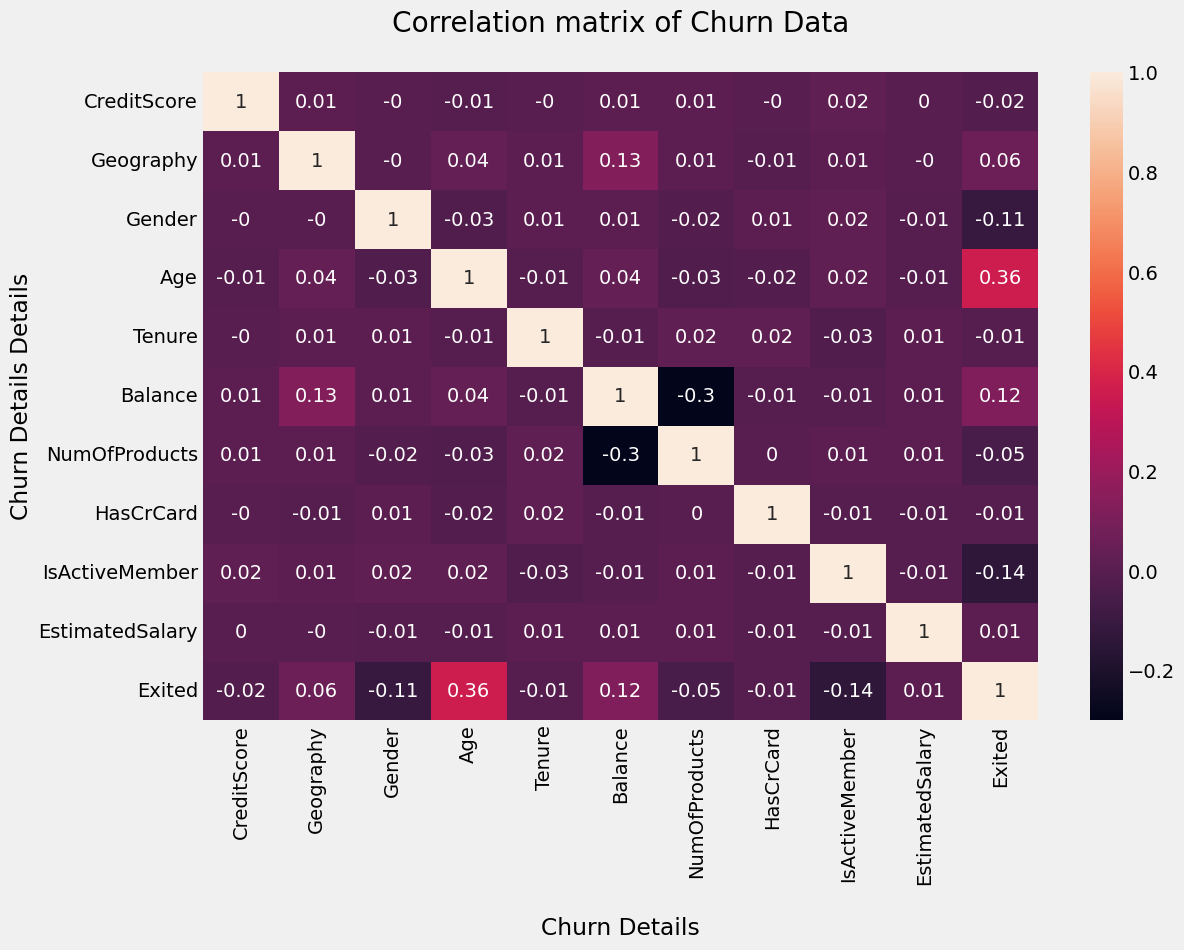

In [179]:
# Finding correlation among numerical features, using heatmap
plt.figure(figsize=(12,8))
hm = sb.heatmap(round(df_scaled_standard.corr(),2), annot = True)
hm.set(xlabel='\nChurn Details', ylabel='Churn Details Details', title = "Correlation matrix of Churn Data\n")
plt.show()

In [184]:
# Correlation between features
# Finding correlation with significance for population

import scipy

chosen_features = []
for i in df_scaled_standard.columns:
 r, p = scipy.stats.pearsonr(df_scaled_standard[i], df_scaled_standard["Exited"])
 print(f"Feature : {i}, corr = {r}, significant : {p<0.05}")
 if p < 0.05 :
     chosen_features.append(i)

Feature : CreditScore, corr = -0.016412764788927187, significant : False
Feature : Geography, corr = 0.06111606082651016, significant : True
Feature : Gender, corr = -0.10676187654054775, significant : True
Feature : Age, corr = 0.35849405940124923, significant : True
Feature : Tenure, corr = -0.012872366637214885, significant : False
Feature : Balance, corr = 0.11691266914564377, significant : True
Feature : NumOfProducts, corr = -0.050669240856427954, significant : True
Feature : HasCrCard, corr = -0.008490577562082402, significant : False
Feature : IsActiveMember, corr = -0.1434236098535317, significant : True
Feature : EstimatedSalary, corr = 0.00912295574371383, significant : False
Feature : Exited, corr = 0.9999999999999991, significant : True


We have concluded CreditScore, Tenure, HasCrCard and EstimatedSalary don't have a significant relationship with Exited or other variables. So we are removing those features for further analysis.

In [202]:
# dropping columns from scaled data

df_scaled_scalar.drop(columns=['CreditScore','Tenure','HasCrCard','EstimatedSalary'])

,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,-0.951235,-1.097157,0.479282,-1.226774,-0.914163,0.992961,1
1,1.318431,-1.097157,0.365625,0.116386,-0.914163,0.992961,0
2,-0.951235,-1.097157,0.479282,1.332056,2.529285,-1.007089,1
3,-0.951235,-1.097157,0.138311,-1.226774,0.807561,-1.007089,0
4,1.318431,-1.097157,0.592939,0.784746,-0.914163,0.992961,0
...,...,...,...,...,...,...,...
9995,-0.951235,0.911446,0.138311,-1.226774,0.807561,-1.007089,0
9996,-0.951235,0.911446,-0.316318,-0.307331,-0.914163,0.992961,0
9997,-0.951235,-1.097157,-0.202661,-1.226774,-0.914163,0.992961,1
9998,0.561876,0.911446,0.479282,-0.023567,0.807561,-1.007089,1


## **3.5) Dimensionality Reduction Using PCA and LDA**

Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) are two dimensionality reduction techniques that are commonly used in machine learning. They both work by projecting data onto a lower-dimensional space, but they have different goals.

PCA is a way to reduce the number of features in a dataset while still preserving most of the information. It does this by finding new features that are linear combinations of the original features. These new features are called principal components, and they are ordered by importance. The first principal component is the most important, and it captures the most variation in the data. The second principal component is the next most important, and it captures the next most variation in the data, and so on.

LDA is similar to PCA, but it takes into account the class labels of the data. This means that LDA can find new features that are specifically useful for distinguishing between the different classes. LDA is often used in machine learning for classification tasks.

In general, PCA is a good choice for dimensionality reduction when the goal is to preserve as much of the information as possible. LDA is a good choice for dimensionality reduction when the goal is to specifically improve the performance of a machine learning classifier.

### **3.5.1) Principal Component Analysis**

In [209]:
#PCA

from sklearn.decomposition import PCA

var_ratio={}
for i in range(2,df_scaled_scalar.shape[1]+1):
    pca=PCA(n_components=i)
    pca.fit(df_scaled_scalar)
    var_ratio[i]=sum(pca.explained_variance_ratio_)

In [210]:
var_ratio

{2: 0.23752748939552382,
 3: 0.3405079372317867,
 4: 0.4412804751548901,
 5: 0.5405743383449899,
 6: 0.638460300054335,
 7: 0.7345051000435199,
 8: 0.829301375309659,
 9: 0.9216156064749177,
 10: 0.9872269062880242,
 11: 1.0}

The n_components parameter specifies the number of principal components to retain after dimensionality reduction.or each value of n_components, the code fits a PCA model to the data and computes the explained variance ratio of the retained principal components. The explained variance ratio of a principal component is the proportion of the total variance in the data that is explained by that component.

The code then stores the sum of the explained variance ratios of the retained principal components in a dictionary called var_ratio. The significance of var_ratio is that it tells us how much of the total variance in the data is explained by the first n_components principal components.

This output tells us that the first two principal components explain 24% of the total variance in the data, the first three principal components explain 34% of the total variance, and so on.

The var_ratio dictionary can be used to choose the optimal value of the n_components parameter for a PCA model. For example, if we want to retain a model that explains at least 90% of the total variance in the data, we would choose the value of n_components that corresponds to a value of var_ratio that is greater than or equal to 0.90.

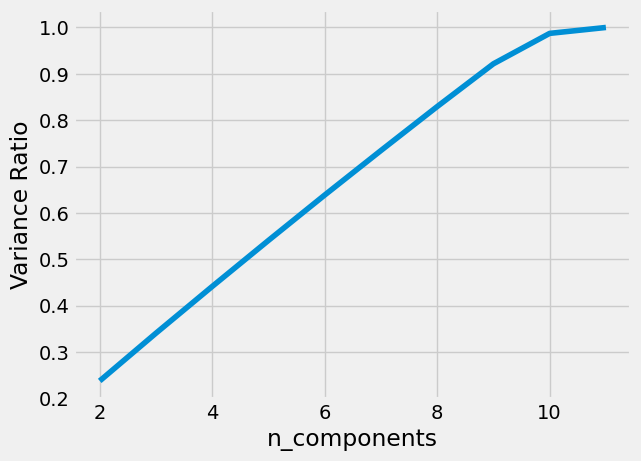

In [211]:
#  plot of n_components vs variance ratio

pd.Series(var_ratio).plot(kind='line')
plt.xlabel('n_components')
plt.ylabel('Variance Ratio')
plt.show()

The variance ratio does not necessarily vary linearly with the number of components in LDA. However, it is often the case that the variance ratio increases rapidly at first, and then plateaus or even decreases as more components are added. This is because the first few components typically capture the most important information in the data, while the later components capture less important information and noise.

In [212]:
# Create a PCA model with 8 components.
pca = PCA(n_components=8)

# Fit the PCA model to the data.
data1 = pca.fit(df_scaled_scalar)

# Calculate the explained variance ratio of the PCA model.
var_ratio = sum(data1.explained_variance_ratio_)

# Print the explained variance ratio to the console.
print('var_ratio :', var_ratio)

# Transform the data using the PCA model.
data2 = pca.fit_transform(X)

# Store the transformed data in a Pandas DataFrame.
pca_df = pd.DataFrame(data2)

# Print the Pandas DataFrame to the console.
pca_df

var_ratio : 0.8293013753096594


,0,1,2,3,4,5,6,7
0,0.470627,0.697828,-0.241780,-1.527612,-0.108613,-0.865275,-1.293894,-0.321709
1,-1.183233,2.226746,0.173103,-0.602636,0.676559,0.240654,0.354831,0.714841
2,0.977621,-0.639629,2.114921,-0.525869,-0.685218,0.519103,-0.430104,-0.019095
3,1.472209,1.239559,0.693086,-1.214353,1.094619,-0.979052,1.232482,-0.156638
4,-1.553811,1.757973,-0.502291,1.106751,-0.556527,-1.972598,-0.517727,0.103177
...,...,...,...,...,...,...,...,...
9621,1.587546,-0.719716,-0.342203,0.391899,-0.031110,-0.727515,0.028096,-0.431774
9622,0.044209,-1.693571,-0.673191,-0.415814,-0.422474,1.479370,-0.951253,-1.017856
9623,0.565889,0.792037,-0.478110,-0.571633,0.264422,-0.372194,1.037967,-2.013747
9624,0.246003,0.091943,-0.185551,0.914679,-0.381701,-0.657239,0.162833,0.677823


### **3.5.2) Linear discriminant analysis**


In [213]:
# Create an LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model to the data
lda.fit(df_scaled_scalar, y)

# Compute the variance ratio
var_ratio = lda.explained_variance_ratio_

# Print the variance ratio
print('Variance ratio:', var_ratio)

Variance ratio: [1.]


The variance ratio can come to 1 in LDA when the model is able to perfectly separate the different classes in the data. In this case, the discriminant functions will explain all of the variance in the data, and the variance ratio will be 1.

However, it is important to note that this is not always the case. In practice, it is often difficult to find a model that can perfectly separate the different classes in the data. As a result, the variance ratio will typically be less than 1.

Here are some reasons why the variance ratio may not be 1 in LDA:

The data may be noisy or contain outliers.
The different classes in the data may not be well-separated.
The model may not be able to find the optimal discriminant functions.
If the variance ratio is not 1, it does not necessarily mean that the LDA model is not performing well. However, it may be a sign that the model could be improved by using more data, feature engineering, or a different model selection procedure.

In [214]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled_scalar, y, test_size=0.25)

# Create an LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test)

# Evaluate the model performance
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8101371001246365


## **3.6) Data Splitting**

There are different methods of Data Splitting in Machine Learning

1) Random train-test split

2) Stratified train-test split

3) K-fold cross-validation

4) Leave-one-out cross-validation

5) Time series split

We will see how to split the using all these techniques.But the best method of data splitting to use depends on the specific characteristics of dataset and machine learning model. In general, it is recommended to use a cross-validation method, such as k-fold cross-validation or leave-one-out cross-validation, to evaluate the performance of model. This will help to avoid overfitting and get a more realistic estimate of the model's performance on unseen data.

In [217]:
# Again Defining input/output

X = df_scaled_scalar         # Features/Atrributes/Input Variable
y = y                             # Label/ Output Variable

### **3.6.1) Random train-test split**

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)   # Splitting data into train and test dataset into 70:30 ratio
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))              # Checking shape of training and test data

Shape of new dataframes - (6738, 11) , (2888, 11)


### **3.6.2) K-fold cross-validation**

In [221]:
kf = KFold(n_splits=3, shuffle=False, random_state=None)               # specifying object
for train, test in kf.split(X):
    print("Train data\n",train,"\n","Test data\n",test)

Train data
 [3209 3210 3211 ... 9623 9624 9625] 
 Test data
 [   0    1    2 ... 3206 3207 3208]
Train data
 [   0    1    2 ... 9623 9624 9625] 
 Test data
 [3209 3210 3211 ... 6415 6416 6417]
Train data
 [   0    1    2 ... 6415 6416 6417] 
 Test data
 [6418 6419 6420 ... 9623 9624 9625]


 It returns index value of each split

### **3.6.3) Leave-one-out cross-validation**

In [ ]:
LOO = LeaveOneOut()                                               # specifying object
for train, test in LOO.split(X):
    print("%s %s"% (train,test))

It returns index value of each split

### **3.6.4) Time series split**

This method is used for time series data, where the order of the samples is important. The dataset is split into training and test sets based on time, with the training set containing older data and the test set containing newer data

We will use random train test split for data splitting and then build a model.

In [224]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7219, 11) (2407, 11) (7219,) (2407,)


# **Step 4 : Model Building**

There are many different machine learning models for regression, but some of the most popular ones include :

1) Logistic regression

2) Decision Tree

3) Random Forest

4) Bagging

5) ADA Boosting

6) Gradient Boosting

6) Key Nearest Neighbour

8) SVR

We will experiment with different machine learning models to find the one that works best for our data and we will also use a cross-validation technique to evaluate the performance of different models data.

## **4.1) Applying all the model together**


In [225]:

# LogisticRegression
logistic = LogisticRegression()
lr = logistic.fit(x_train, y_train)
y_pred_lr = logistic.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf = rfmodel.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier
bagg = BaggingClassifier()
bg = bagg.fit(x_train, y_train)
y_pred_bg = bagg.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# AdaBoostClassifier
ada = AdaBoostClassifier()
ad = ada.fit(x_train, y_train)
y_pred_ad = ada.predict(x_test)
accuracy_ad = accuracy_score(y_test, y_pred_ad)

# GradientBoostingClassifier
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train, y_train)
y_pred_gd = gdb.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# XGBClassifier = RF + GDBoosting - lambda - regularisation, gamma - autoprunning, eta - learning optimization rate
xgb = XGBClassifier()
xg = xgb.fit(x_train, y_train)
y_pred_xg = xgb.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# SVM
svc = SVC()
sv = svc.fit(x_train, y_train)
y_pred_sv = svc.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)

# KNN
knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# GaussianNB
naive_gb = GaussianNB()
ngb = naive_gb.fit(x_train, y_train)
y_pred_ngb = naive_gb.predict(x_test)
accuracy_ngb = accuracy_score(y_test, y_pred_ngb)

# BernoulliNB
naive_bn = BernoulliNB()
nbr = naive_bn.fit(x_train, y_train)
y_pred_nbr = naive_bn.predict(x_test)
accuracy_nbr = accuracy_score(y_test, y_pred_nbr)

In [226]:
evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),('ad',ad),
 ('gd', gd),('xg', xg),('sv', sv),('kn', kn),
 ('ngb', ngb),('nbr', nbr)], voting='hard')
model_evc = evc.fit(x_train, y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

              Method Used  Accuracy
0      LogisticRegression  1.000000
1            DecisionTree  1.000000
2            RandomForest  1.000000
3                 Bagging  1.000000
4                Adaboost  1.000000
5        GradientBoosting  1.000000
6                 XGBoost  1.000000
7           SupportVector  1.000000
8       KNearestNeighbors  0.912339
9      NaiveBayesGaussian  1.000000
10  NaiveBayesBernoullies  1.000000
11       VotingClassifier  1.000000
Axes(0.08,0.07;0.87x0.81)


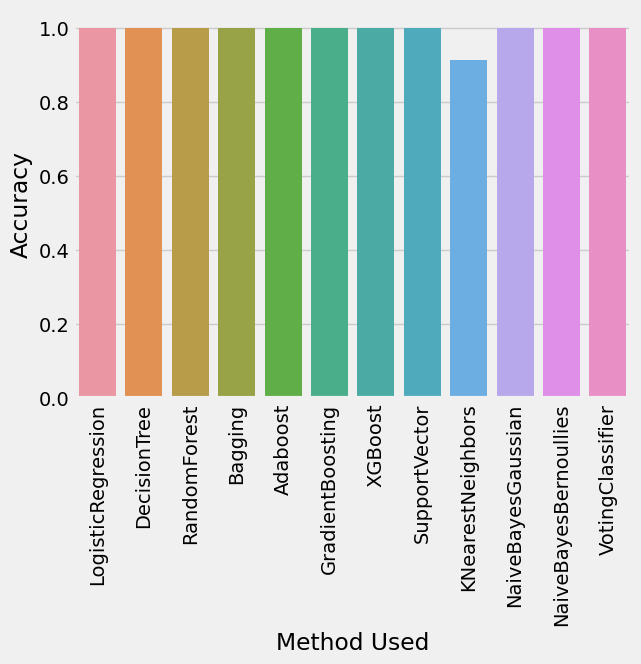

In [228]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Bagging','Adaboost',
 'GradientBoosting', 'XGBoost','SupportVector','KNearestNeighbors',
 'NaiveBayesGaussian','NaiveBayesBernoullies','VotingClassifier']
list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_bg,accuracy_ad, accuracy_gd,
 accuracy_xg, accuracy_sv, accuracy_knn, accuracy_ngb, accuracy_nbr, accuracy_evc]
list3 = [logistic, dtree, rfmodel, bagg, ada, gdb, xgb, svc, knn, naive_gb,naive_bn, evc ]
final_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})
print(final_accuracy)
charts = sb.barplot(x="Method Used", y = 'Accuracy', data=final_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

In [230]:
training_accuracy = cross_val_score(gdb, x_train, y_train, cv=15)
test_accuracy = cross_val_score(gdb, x_test, y_test, cv=15)
print(training_accuracy[9])
print(test_accuracy[7])


1.0
1.0


In [231]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(dtree, x_train, y_train, cv=15)
test_accuracy = cross_val_score(dtree, x_test, y_test, cv=15)
print(training_accuracy[9])
print(test_accuracy[7])


1.0
1.0


In [232]:
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=15)
test_accuracy = cross_val_score(xgb, x_test, y_test, cv=15)
print(training_accuracy[9])
print(test_accuracy[7])

1.0
1.0


In [233]:
print("Logistic Regression Report:")
cr = classification_report(y_test, y_pred_lr)
print(cr)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1907
           1       1.00      1.00      1.00       500

    accuracy                           1.00      2407
   macro avg       1.00      1.00      1.00      2407
weighted avg       1.00      1.00      1.00      2407



In [234]:
print("Decision Trees Classification Report:")
cr = classification_report(y_test, y_pred_dt)
print(cr)

Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1907
           1       1.00      1.00      1.00       500

    accuracy                           1.00      2407
   macro avg       1.00      1.00      1.00      2407
weighted avg       1.00      1.00      1.00      2407



In [235]:
print("Random Forest Classification Report:")
cr = classification_report(y_test, y_pred_rf)
print(cr)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1907
           1       1.00      1.00      1.00       500

    accuracy                           1.00      2407
   macro avg       1.00      1.00      1.00      2407
weighted avg       1.00      1.00      1.00      2407



In [236]:
print("Gradient Boosting Classification Report:")
cr = classification_report(y_test, y_pred_gd)
print(cr)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1907
           1       1.00      1.00      1.00       500

    accuracy                           1.00      2407
   macro avg       1.00      1.00      1.00      2407
weighted avg       1.00      1.00      1.00      2407



In [237]:
print("XGboost classification Report:")
cr = classification_report(y_test, y_pred_xg)
print(cr)


XGboost classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1907
           1       1.00      1.00      1.00       500

    accuracy                           1.00      2407
   macro avg       1.00      1.00      1.00      2407
weighted avg       1.00      1.00      1.00      2407



## **4.2) Ensemble Techniques**

Ensemble techniques are a machine learning paradigm that combines multiple machine learning models to improve the overall performance of the model. Ensemble techniques are often used to improve the accuracy, generalization, and robustness of machine learning models.

There are many different ensemble techniques, but some of the most common include:

**Bagging**: Bagging, also known as bootstrap aggregating, is an ensemble technique that creates multiple subsets of the training data and trains a separate machine learning model on each subset. The predictions of the individual models are then combined to produce a final prediction.

**Boosting**: Boosting is an ensemble technique that trains multiple machine learning models in a sequential manner. Each model is trained on the weighted training data, where the weights are assigned to the training samples based on the performance of the previous model. The predictions of the individual models are then combined to produce a final prediction.

**Stacking**: Stacking is an ensemble technique that trains a meta-model to combine the predictions of multiple machine learning models. The meta-model is trained on the predictions of the individual models and the labels of the training data. The meta-model is then used to make predictions on new data.
Ensemble techniques can be used with any type of machine learning model, such as decision trees, support vector machines, and neural networks. Ensemble techniques are often used to improve the performance of machine learning models on complex tasks, such as image classification, natural language processing, and fraud detection.

Here are some of the benefits of using ensemble techniques:

Improved accuracy: Ensemble techniques can often improve the accuracy of machine learning models by reducing overfitting and improving the generalizability of the models.

Reduced variance: Ensemble techniques can reduce the variance of machine learning models, making them more robust to noise in the data.

Increased interpretability: Ensemble techniques can make machine learning models more interpretable by providing insights into the relative importance of different features.

Ensemble techniques are a powerful tool that can be used to improve the performance of machine learning models on a wide range of tasks.



### **4.2.1) Stacking**

In [244]:
result = []
names = []

In [248]:
# define the model
stacking_model = StackingClassifier(cv=5,estimators=[('lr',lr),('dt',dt),('rf', rf),('sv', sv),('kn', kn),('ngb', ngb),('nbr', nbr)],final_estimator=LogisticRegression())

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(stacking_model, x_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
result.append(n_scores)
names.append('stacking')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

F1-Score: 1.000 (0.000)


### **4.2.2) Bagging with Decision Tree**

In [253]:
results,names = [],[]

# define the model
model = DecisionTreeClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('cart')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

F1-Score: 1.000 (0.000)


### **4.2.3) Bagging with Random Forest (For comparison)**

In [254]:
results,names = [],[]

# define the model
model = RandomForestClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('rf')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

F1-Score: 1.000 (0.000)


### **4.2.4) Boosting with ADA Boosting**

In [255]:
results,names = [],[]

# define the model
model = AdaBoostClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('ada')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

F1-Score: 1.000 (0.000)


# **Step 5 : Predicting Data using Model**

In [257]:
model = LogisticRegression()
model = logistic.fit(x_train, y_train)

# Predicting data
y_pred = model.predict(x_test)

# Printing the result
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## **Step 6 : Model Evaluation**

In [258]:
# Model evaluation

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1907
           1       1.00      1.00      1.00       500

    accuracy                           1.00      2407
   macro avg       1.00      1.00      1.00      2407
weighted avg       1.00      1.00      1.00      2407



# ***We have seen that all classification models built using training dataset have 100% accuracy except KNN***